In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import cv2

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)


In [10]:
DATA_DIR = Path(r"C:\Users\MSI GF66\OneDrive - National Polyechnic University of Armenia\Desktop\Emotion_recognition\data\raw\fer2013")
TRAIN_DIR = DATA_DIR / 'train'
TEST_DIR = DATA_DIR / 'test'
RESULTS_DIR = Path(r"C:\Users\MSI GF66\OneDrive - National Polyechnic University of Armenia\Desktop\Emotion_recognition\results\emotion_exploration")
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

EMOTION_LABELS = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

print(f"Train directory: {TRAIN_DIR}")
print(f"Test directory: {TEST_DIR}")
print(f"Results will be saved to: {RESULTS_DIR}")


Train directory: C:\Users\MSI GF66\OneDrive - National Polyechnic University of Armenia\Desktop\Emotion_recognition\data\raw\fer2013\train
Test directory: C:\Users\MSI GF66\OneDrive - National Polyechnic University of Armenia\Desktop\Emotion_recognition\data\raw\fer2013\test
Results will be saved to: C:\Users\MSI GF66\OneDrive - National Polyechnic University of Armenia\Desktop\Emotion_recognition\results\emotion_exploration


## Dataset Structure

In [11]:
def count_images_per_class(directory):
    class_counts = {}
    for emotion in os.listdir(directory):
        emotion_path = os.path.join(directory, emotion)
        if os.path.isdir(emotion_path):
            count = len([f for f in os.listdir(emotion_path) if f.endswith(('.jpg', '.png'))])
            class_counts[emotion] = count
    return class_counts

train_counts = count_images_per_class(TRAIN_DIR)
test_counts = count_images_per_class(TEST_DIR)

print("=== TRAIN SET ===")
total_train = sum(train_counts.values())
for emotion, count in sorted(train_counts.items()):
    print(f"{emotion.capitalize():12s}: {count:5d} images")
print(f"{'Total':12s}: {total_train:5d} images\n")

print("=== TEST SET ===")
total_test = sum(test_counts.values())
for emotion, count in sorted(test_counts.items()):
    print(f"{emotion.capitalize():12s}: {count:5d} images")
print(f"{'Total':12s}: {total_test:5d} images")


=== TRAIN SET ===
Angry       :  3995 images
Disgust     :   436 images
Fear        :  4097 images
Happy       :  7215 images
Neutral     :  4965 images
Sad         :  4830 images
Surprise    :  3171 images
Total       : 28709 images

=== TEST SET ===
Angry       :   958 images
Disgust     :   111 images
Fear        :  1024 images
Happy       :  1774 images
Neutral     :  1233 images
Sad         :  1247 images
Surprise    :   831 images
Total       :  7178 images


## Class Distribution Visualization

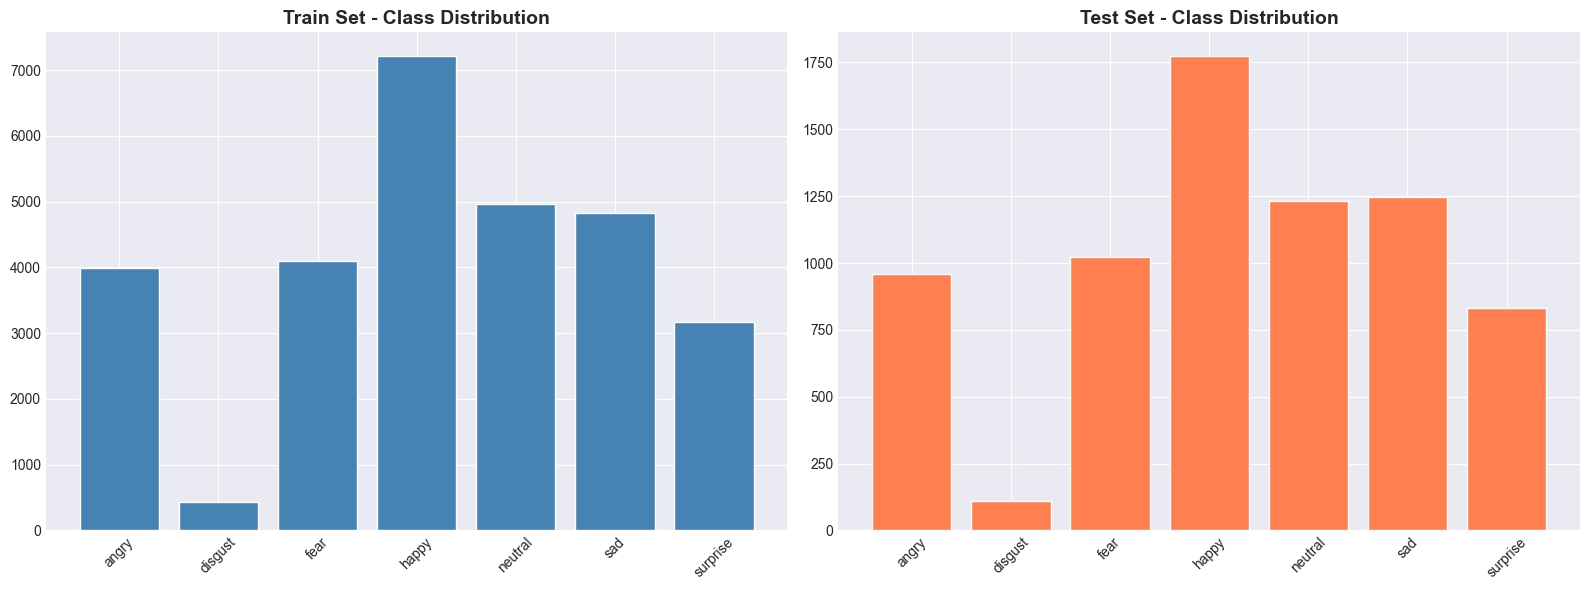

In [12]:
df_train = pd.DataFrame(list(train_counts.items()), columns=['Emotion', 'Count'])
df_test = pd.DataFrame(list(test_counts.items()), columns=['Emotion', 'Count'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].bar(df_train['Emotion'], df_train['Count'], color='steelblue')
axes[0].set_title('Train Set - Class Distribution', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(df_test['Emotion'], df_test['Count'], color='coral')
axes[1].set_title('Test Set - Class Distribution', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(RESULTS_DIR / 'class_distribution.png', dpi=300)
plt.show()


## Class Imbalance

=== CLASS IMBALANCE ANALYSIS ===
Imbalance ratio: 16.55:1



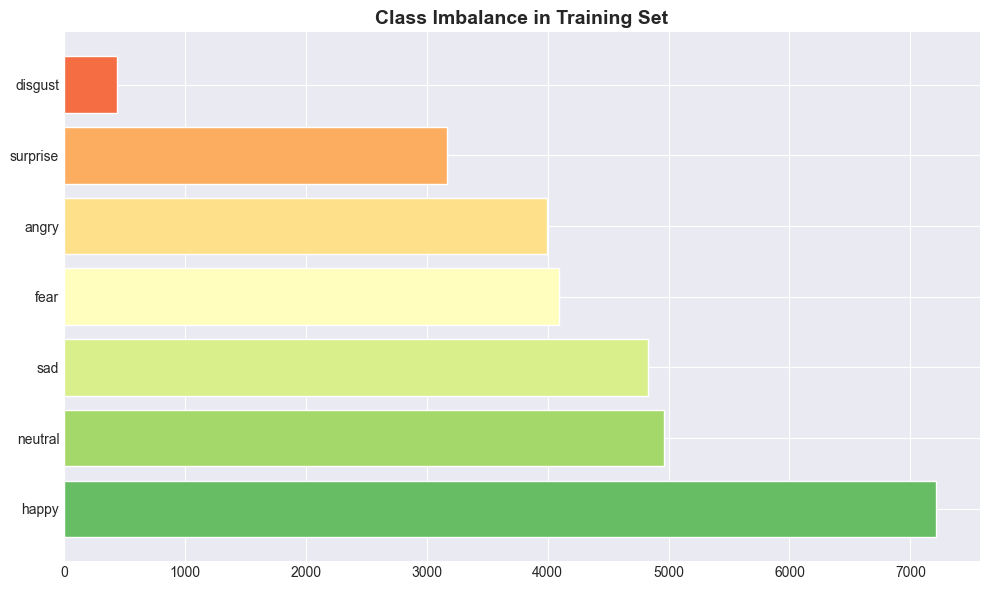

In [13]:
max_count_train = max(train_counts.values())
min_count_train = min(train_counts.values())

print("=== CLASS IMBALANCE ANALYSIS ===")
print(f"Imbalance ratio: {max_count_train/min_count_train:.2f}:1\n")

fig, ax = plt.subplots(figsize=(10, 6))
sorted_items = sorted(train_counts.items(), key=lambda x: x[1], reverse=True)
emotions, counts = zip(*sorted_items)

ax.barh(emotions, counts, color=plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(emotions))))
ax.set_title('Class Imbalance in Training Set', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(RESULTS_DIR / 'class_imbalance.png', dpi=300)
plt.show()


## Sample Image Visualization

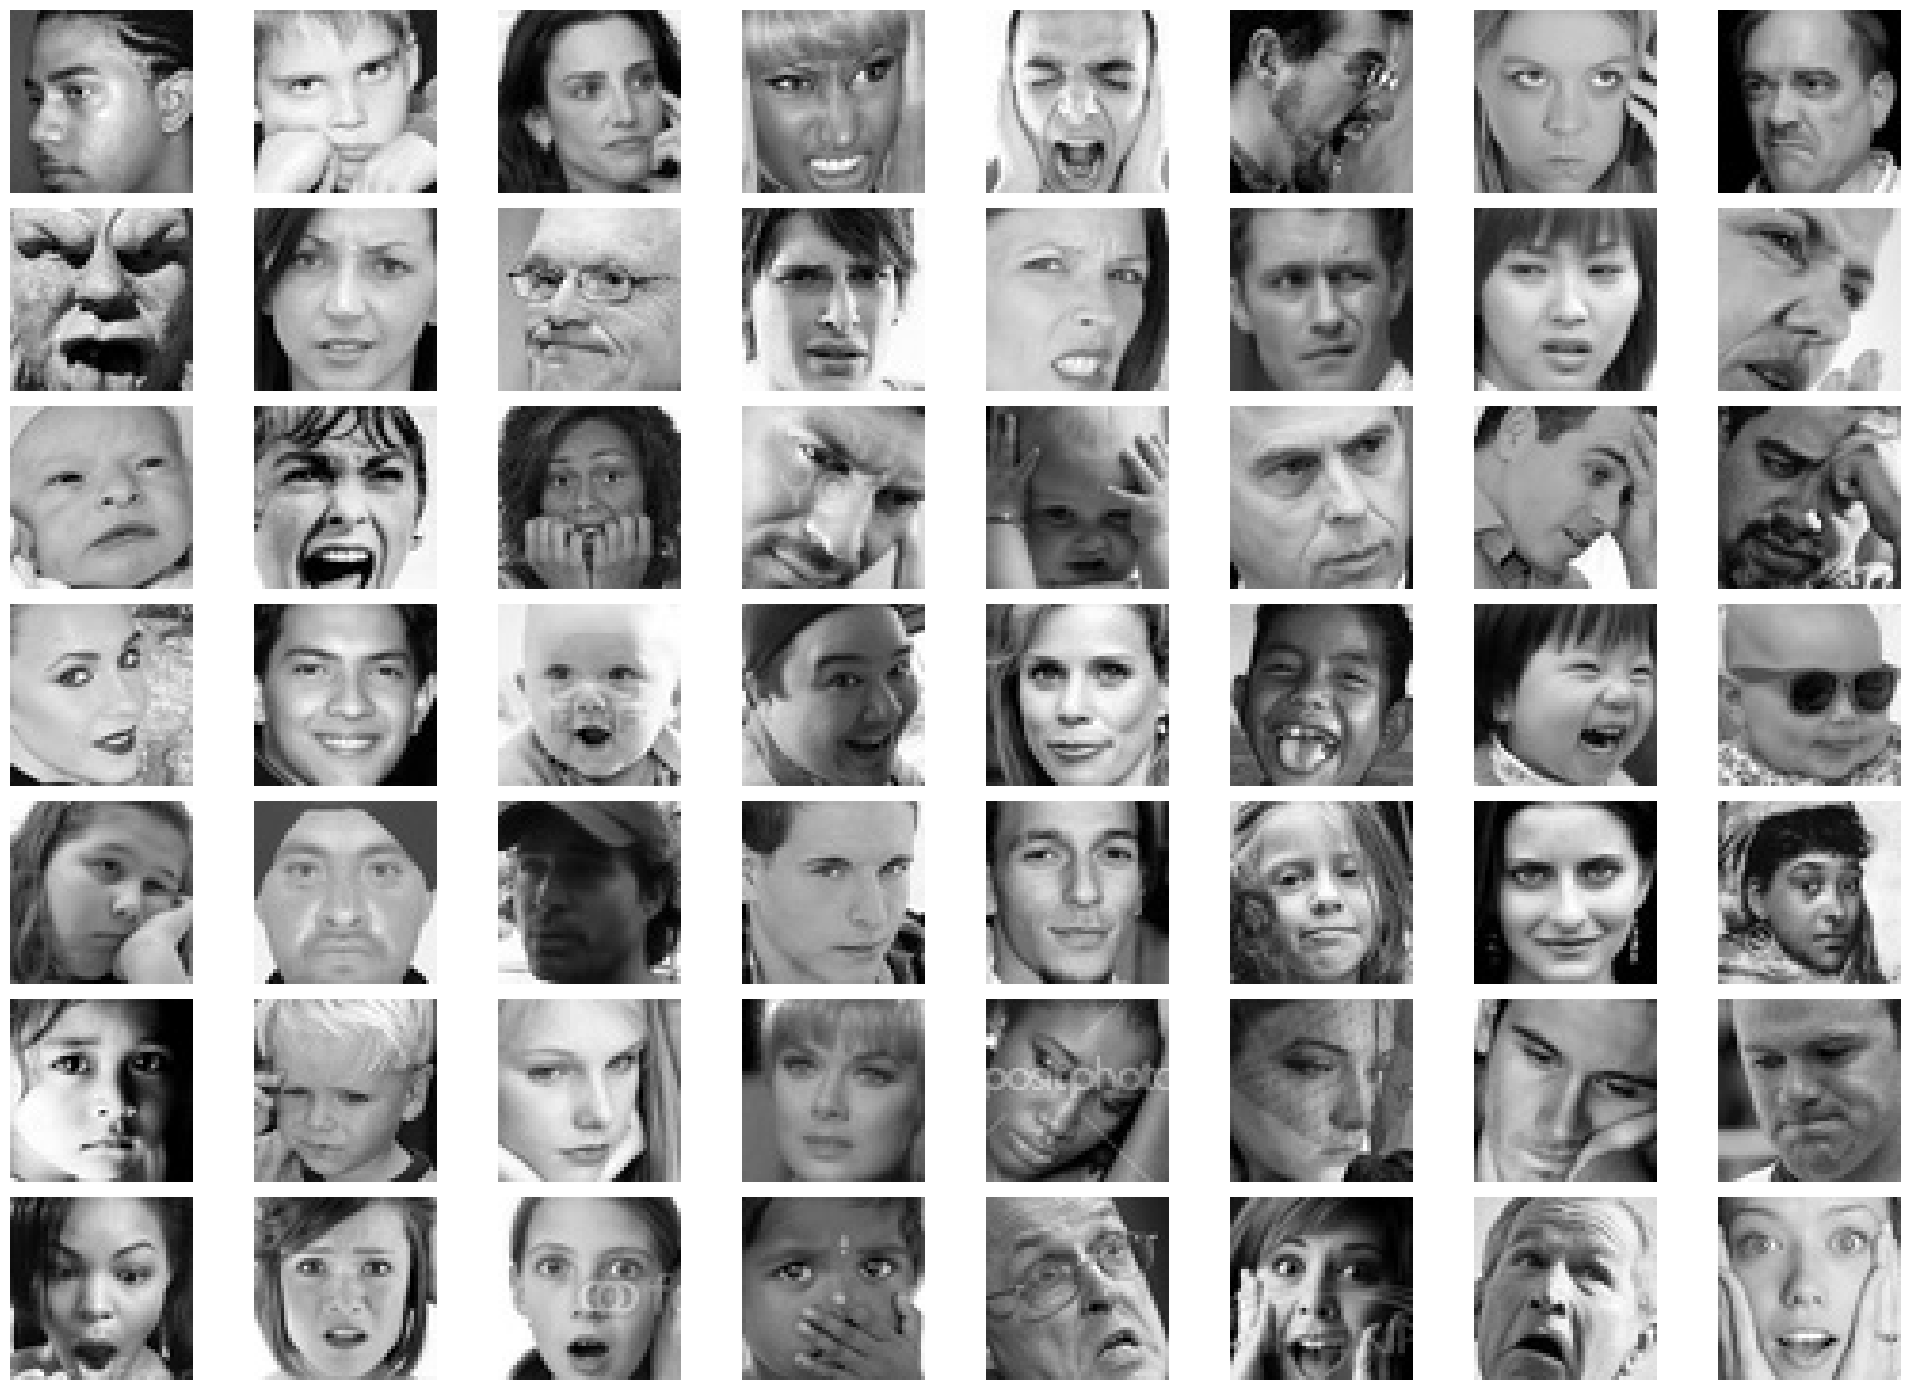

In [14]:
def load_sample_images(directory, n_samples=5):
    samples = {}
    for emotion in os.listdir(directory):
        emotion_path = os.path.join(directory, emotion)
        if os.path.isdir(emotion_path):
            images = [f for f in os.listdir(emotion_path) if f.endswith(('.jpg', '.png'))]
            sampled = np.random.choice(images, min(n_samples, len(images)), replace=False)
            samples[emotion] = [cv2.imread(os.path.join(emotion_path, img), cv2.IMREAD_GRAYSCALE)
                                for img in sampled]
    return samples

sample_images = load_sample_images(TRAIN_DIR, n_samples=8)

fig, axes = plt.subplots(len(sample_images), 8, figsize=(20, 14))
for i, (emotion, imgs) in enumerate(sorted(sample_images.items())):
    for j, img in enumerate(imgs):
        axes[i, j].imshow(img, cmap='gray')
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_ylabel(emotion.capitalize(), fontsize=12, fontweight='bold', rotation=0)
plt.tight_layout()
plt.savefig(RESULTS_DIR / 'sample_images.png', dpi=300)
plt.show()


## Image Quality and Properties

In [15]:
def analyze_image_properties(directory, n_samples=500):
    props = {'brightness': [], 'contrast': [], 'sharpness': []}
    all_imgs = []
    for emotion in os.listdir(directory):
        emotion_path = os.path.join(directory, emotion)
        if os.path.isdir(emotion_path):
            all_imgs += [os.path.join(emotion_path, f) for f in os.listdir(emotion_path)
                         if f.endswith(('.jpg', '.png'))]
    sampled = np.random.choice(all_imgs, min(n_samples, len(all_imgs)), replace=False)

    for img_path in sampled:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        props['brightness'].append(np.mean(img))
        props['contrast'].append(np.std(img))
        props['sharpness'].append(cv2.Laplacian(img, cv2.CV_64F).var())
    return props

properties = analyze_image_properties(TRAIN_DIR, n_samples=1000)


## Summary

In [16]:
summary = {
    'Dataset': 'FER2013',
    'Total Train Samples': total_train,
    'Total Test Samples': total_test,
    'Number of Classes': len(train_counts),
    'Image Size': '48x48',
    'Color Mode': 'Grayscale',
    'Imbalance Ratio': f"{max_count_train/min_count_train:.2f}:1",
    'Most Common Class': max(train_counts, key=train_counts.get),
    'Least Common Class': min(train_counts, key=train_counts.get)
}

print("\n" + "="*50)
print("DATASET SUMMARY")
print("="*50)
for key, value in summary.items():
    print(f"{key:25s}: {value}")
print("="*50)



DATASET SUMMARY
Dataset                  : FER2013
Total Train Samples      : 28709
Total Test Samples       : 7178
Number of Classes        : 7
Image Size               : 48x48
Color Mode               : Grayscale
Imbalance Ratio          : 16.55:1
Most Common Class        : happy
Least Common Class       : disgust
